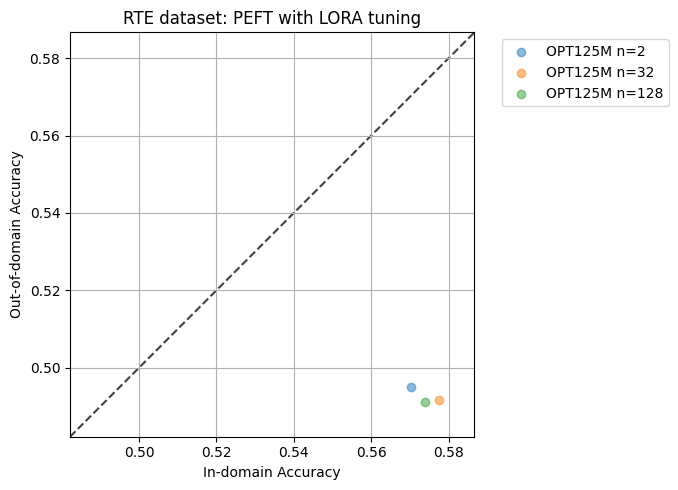

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure plots directory exists
folder_path = "/Users/yueyang/Downloads/plots"
os.makedirs(folder_path, exist_ok=True)

def plot_accuracy_with_customizations(df1, df2, dataset, tuner, model1_label='OPT125M', model2_label='OPT350M'):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.scatter(df1['in_domain_accuracy'], df1['out_of_domain_accuracy'], alpha=0.5, label=model1_label)
    if df2 is not None:
        ax.scatter(df2['in_domain_accuracy'], df2['out_of_domain_accuracy'], alpha=0.5, label=model2_label, marker='x')

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.grid(True)
    ax.set_xlabel('In-domain Accuracy')
    ax.set_ylabel('Out-of-domain Accuracy')
    ax.set_title(f"{dataset}: {tuner}")
    ax.legend()

    plt.savefig(f"{folder_path}/{dataset}_{tuner}_all.png", bbox_inches='tight')
    plt.show()


def plot_accuracy_with_customizations2(df1, df2, dataset, tuner, model1_label='OPT125M', model2_label='OPT350M'):
    fig, ax = plt.subplots(figsize=(10, 5))

    for _, row in df1.iterrows():
        ax.scatter(row['in_domain_accuracy'], row['out_of_domain_accuracy'], alpha=0.5,
                   label=f'{model1_label} n={int(row["n"])}')

    if df2 is not None:
        for _, row in df2.iterrows():
            ax.scatter(row['in_domain_accuracy'], row['out_of_domain_accuracy'], alpha=0.5,
                       label=f'{model2_label} n={int(row["n"])}', marker='x')

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    # ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
    margin = (lims[1] - lims[0]) * 0.1  # 10% margin

    ax.plot([lims[0] - margin, lims[1] + margin], [lims[0] - margin, lims[1] + margin], 'k--', alpha=0.75, zorder=0)

    ax.set_aspect('equal')
    # ax.set_xlim(lims)
    # ax.set_ylim(lims)
    ax.set_xlim(lims[0] - margin, lims[1] + margin)
    ax.set_ylim(lims[0] - margin, lims[1] + margin)
    
    ax.grid(True)
    ax.set_xlabel('In-domain Accuracy')
    ax.set_ylabel('Out-of-domain Accuracy')
    ax.set_title(f"{dataset}: {tuner}")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{folder_path}/{dataset}_{tuner}_all.png", bbox_inches='tight')
    plt.show()


# Load your dataset
df_125M = pd.read_csv('/Users/yueyang/Downloads/peft_Lora_RTE_V3.csv')

# Plot data
dataset = "RTE dataset"
tuner = "PEFT with LORA tuning"
avg_125M = df_125M.groupby('n').agg({'in_domain_accuracy': 'mean', 'out_of_domain_accuracy': 'mean'}).reset_index()
plot_accuracy_with_customizations2(avg_125M, None, dataset, tuner)
